## Evaluate cont.dat files

**Script by:** Adele Plunkett, June 2023

This is a script for evaluating the COMPASS pipeline run, Phase 1. It will show continuum frequency ranges determined in Phase 2, compared with continuum frequency ranges determined by the ALMA pipeline.

* Phase 1:  running the imaging pipeline WITHOUT continuum subtraction
* Phase 2:  Determining the continuum channels, and updating the cont.dat file


*EXAMPLE*: BHR71-IR_a_07_TM1

*output images were:*
* oussid.s8_0.BHR71-IRS1_sci.spw25.cube.I.iter1.image.pbcor/
* oussid.s8_0.BHR71-IRS1_sci.spw27.cube.I.iter1.image.pbcor/
* oussid.s8_0.BHR71-IRS1_sci.spw29.cube.I.iter1.image.pbcor/
* oussid.s8_0.BHR71-IRS1_sci.spw31.cube.I.iter1.image.pbcor/

Script compass_pipeassess_ph02_BHR71_IR_a.py generated the spectra files *.spec.txt

**Check the following:**
* Any channel ranges that seem huge, or out of the range of the SPW. There may have been a typo
* Any ranges in the updated (Phase 2) cont.dat file that include fewer than 5 channels, which might need to be inspected to verify that they should truly be included, and whether more channels could reasonably be added.
* If less bandwidth is included in the updated (Phase 2) cont.dat file, compared with the ALMA Pipeline cont.dat file.  Check to be certain that we still have sufficient bandwidth for continuum subtraction.


In [1]:
## import statements

import glob as glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
import seaborn as sns

import plotly
from plotly import graph_objects as go

### The only changes/checks you need are here in the next 2 cells

In [2]:
## target name here should match the text string in the image name
targetname = 'BHR71-IRS1'


In [3]:
## image list of all spectra
speclist = sorted(glob.glob('*.'+targetname+'*.spec.txt'))
contdat_pl = 'cont_v0.dat' #pipeline version of cont.dat
contdat_new = 'cont.dat' #your updated version of cont.dat from Phase 2

### You should not need to touch anything below

In [4]:
## Print filenames as a check
print('Check file names of spectra:')
speclist

Check file names of spectra:


['oussid.s8_0.BHR71-IRS1_sci.spw25.cube.I.iter1.image.pbcor.spec.txt',
 'oussid.s8_0.BHR71-IRS1_sci.spw27.cube.I.iter1.image.pbcor.spec.txt',
 'oussid.s8_0.BHR71-IRS1_sci.spw29.cube.I.iter1.image.pbcor.spec.txt',
 'oussid.s8_0.BHR71-IRS1_sci.spw31.cube.I.iter1.image.pbcor.spec.txt']

In [5]:
## read in spectra as data frames
myhead = pd.read_csv(speclist[0],nrows=0,skiprows=3,delimiter=r"\s+")
spw01 = pd.read_csv(speclist[0],delimiter=r"\s+",comment='#',header=None, names=myhead.keys()[1:])
spw02 = pd.read_csv(speclist[1],delimiter=r"\s+",comment='#',header=None, names=myhead.keys()[1:])
spw03 = pd.read_csv(speclist[2],delimiter=r"\s+",comment='#',header=None, names=myhead.keys()[1:])
spw04 = pd.read_csv(speclist[3],delimiter=r"\s+",comment='#',header=None, names=myhead.keys()[1:])


## Here we deal with PL version of cont.dat

In [6]:
## read in cont.dat pipeline files as data frames
with open(contdat_pl, 'r') as file:
    lines = file.readlines()

# Remove empty lines
lines = [line.strip() for line in lines if line.strip()]

# Remove the first line
lines = lines[1:]

In [7]:
# Initialize variables
dfs = []
current_window = None
df_data = []

# Process to get start and end frequencies on each line
for line in lines:
    if line.startswith('SpectralWindow'):
        # Check if there is previous data to create a DataFrame
        if current_window and df_data:
            df = pd.DataFrame(df_data, columns=['Start Frequency', 'End Frequency'])
            dfs.append((current_window, df))
            df_data = []  # Reset the data for the new window
        current_window = line.split(':')[1].strip()
    else:
        freqs = line.split('~')
        start_freq, end_freq = freqs[0].replace('GHz LSRK', ''), freqs[1].replace('GHz LSRK', '')
        df_data.append({'Start Frequency': start_freq, 'End Frequency': end_freq})

# Check if there is remaining data to add to a DataFrame
if current_window and df_data:
    df = pd.DataFrame(df_data, columns=['Start Frequency', 'End Frequency'])
    dfs.append((current_window, df))

# Print the tables
for spectral_window, df in dfs:
    print(f"SpectralWindow: {spectral_window}")
    print(df)
    print()



SpectralWindow: 25
  Start Frequency   End Frequency
0  279.1743781479  279.1758430041
1  279.2798477943  279.2815567932
2  279.7705746212  279.7715511920

SpectralWindow: 27
   Start Frequency   End Frequency
0   279.9610357859  279.9639654983
1   279.9822762008  279.9832527716
2   279.9886239110  279.9913094807
3   280.0052256146  280.0096201832
4   280.0584487232  280.0599135794
5   280.0872575618  280.0884782753
6   280.1143574015  280.1170429712
7   280.1275411073  280.1297383916
8   280.1832056429  280.1871119261
9   280.2298368986  280.2330107537
10  280.2403350347  280.2420440336
11  280.2559601675  280.2569367383
12  280.2698763014  280.2708528722
13  280.2779330105  280.2811068656
14  280.2830600072  280.2855014342
15  280.3274939787  280.3301795484
16  280.3462929666  280.3472695374
17  280.3526406768  280.3555703892
18  280.3572793881  280.3592325297
19  280.3611856713  280.3631388129
20  280.3843792278  280.3860882267
21  280.4944875855  280.4966848698
22  280.5047415789  

## Here we deal with your updated version of cont.dat

In [8]:
## Same as above, for updated cont.dat file
# Read the text file
with open(contdat_new, 'r') as file:
    lines_new = file.readlines()

# Remove empty lines
lines_new = [line.strip() for line in lines_new if line.strip()]

# Remove the first line
lines_new = lines_new[1:]

In [9]:
# Initialize variables
dfs_new = []
current_window = None
df_data_new = []

# Process the lines
for line in lines_new:
    if line.startswith('SpectralWindow'):
        # Check if there is previous data to create a DataFrame
        if current_window and df_data:
            df = pd.DataFrame(df_data_new, columns=['Start Frequency', 'End Frequency'])
            dfs_new.append((current_window, df))
            df_data_new = []  # Reset the data for the new window
        current_window = line.split(':')[1].strip()
    else:
        freqs = line.split('~')
        start_freq, end_freq = freqs[0].replace('GHz LSRK', ''), freqs[1].replace('GHz LSRK', '')
        df_data_new.append({'Start Frequency': start_freq, 'End Frequency': end_freq})

# Check if there is remaining data to create a DataFrame
if current_window and df_data_new:
    df = pd.DataFrame(df_data_new, columns=['Start Frequency', 'End Frequency'])
    dfs_new.append((current_window, df))

# Print the tables
for spectral_window, df in dfs_new:
    print(f"SpectralWindow: {spectral_window}")
    print(df)
    print()



SpectralWindow: 25
  Start Frequency   End Frequency
0          279.17  279.1758430041
1         279.278         279.281
2       279.77057        279.7795
3         279.154         279.161
4          279.89         279.893

SpectralWindow: 27
   Start Frequency End Frequency
0        279.96104     279.96397
1        280.00523     280.00962
2          280.053       280.055
3        280.08848       280.091
4        280.12754     280.12974
5        280.24034     280.24204
6          280.285       280.292
7        280.34629     280.36314
8        280.49449      280.4966
9        280.50474     280.51085
10         280.569       280.574
11        280.6075       280.612
12        280.6738      280.6795
13       280.76646       280.769
14       280.87950     280.89098

SpectralWindow: 29
   Start Frequency End Frequency
0        280.88249       280.897
1        280.92131     280.93205
2        280.95329        280.96
3          280.966     280.97526
4          280.989     280.99870
5          

## Plot all spectral windows and continuum ranges

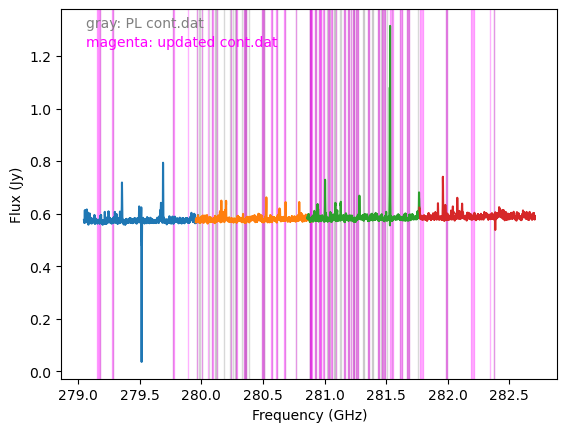

In [10]:
## Single plot, no zoom
plt.plot(spw01['frequency_(GHz)'],spw01['Flux_density_(Jy)'])
plt.plot(spw02['frequency_(GHz)'],spw02['Flux_density_(Jy)'])
plt.plot(spw03['frequency_(GHz)'],spw03['Flux_density_(Jy)'])
plt.plot(spw04['frequency_(GHz)'],spw04['Flux_density_(Jy)'])
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')
for spectral_window, df in dfs:
    for index, row in df.iterrows():
        start_freq = float(row['Start Frequency'])
        end_freq = float(row['End Frequency'])
        plt.axvspan(start_freq, end_freq, alpha=0.3, color='gray')
for spectral_window, df in dfs_new:
    for index, row in df.iterrows():
        start_freq = float(row['Start Frequency'])
        end_freq = float(row['End Frequency'])
        plt.axvspan(start_freq, end_freq, alpha=0.3, color='magenta')
        
plt.annotate(xy =(0.05,0.95),text='gray: PL cont.dat',color='gray',xycoords='axes fraction')
plt.annotate(xy =(0.05,0.9),text='magenta: updated cont.dat',color='magenta',xycoords='axes fraction')

# Show the plot
plt.savefig('compass_contdat_ph02_allspec.png',dpi=300)

In [ ]:
#Plots spectra using plotly package and output to a portable html file, which provides interactive user interface.
fig = go.Figure(layout=dict(xaxis_title='Frequency (GHz)', yaxis_title='Flux (Jy)'))
for i, spw in enumerate([spw01, spw02, spw03, spw04]):
    fig.add_trace(go.Scatter(x=spw['frequency_(GHz)'], y=spw['Flux_density_(Jy)'], line_shape='vh', name='spw'+dfs_new[i][0]))

for spectral_window, df in dfs:
    for index, row in df.iterrows():
        start_freq = float(row['Start Frequency'])
        end_freq = float(row['End Frequency'])
        fig.add_vrect(x0=start_freq, x1=end_freq, fillcolor='grey', opacity=0.7, line_width=0)
for spectral_window, df in dfs_new:
    for index, row in df.iterrows():
        start_freq = float(row['Start Frequency'])
        end_freq = float(row['End Frequency'])
        fig.add_vrect(x0=start_freq, x1=end_freq, fillcolor='magenta', opacity=0.3, line_width=0)
        
fig.add_shape(type='rect', x0=0.05, x1=0.15, y0=0.85, y1=0.95, xref='paper', yref='paper', line_width=0,
              label=dict(text='gray: PL cont.dat', textposition='middle left', font=dict(color='grey', size=18)))
fig.add_shape(type='rect', x0=0.05, x1=0.15, y0=0.80, y1=0.90, xref='paper', yref='paper', line_width=0,
              label=dict(text='magenta: updated cont.dat', textposition='middle left', font=dict(color='magenta', size=18)))
        
open('compass_contdat_ph02_allspec.html', 'w').write(fig.to_html(include_mathjax='cdn', include_plotlyjs='cdn'))

## Plot each spectral window and continuum ranges in separate panels

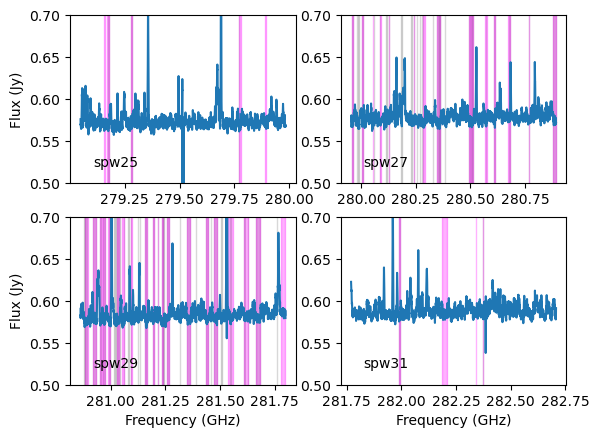

In [11]:
## Multi-panel with zoom
plt.subplot(221)
## SPW25
plt.plot(spw01['frequency_(GHz)'],spw01['Flux_density_(Jy)'])
mydfs = dfs[0][1]
for index, row in mydfs.iterrows():
    start_freq = float(row['Start Frequency'])
    end_freq = float(row['End Frequency'])
    plt.axvspan(start_freq, end_freq, alpha=0.3, color='gray')
#print(dfs[0][0])
mydfs_new = dfs_new[0][1]
for index, row in mydfs_new.iterrows():
    start_freq = float(row['Start Frequency'])
    end_freq = float(row['End Frequency'])
    plt.axvspan(start_freq, end_freq, alpha=0.3, color='magenta')
#print(dfs_new[0][0])
plt.ylim([0.5,0.7])
plt.annotate(xy=(0.1,0.1),text='spw'+dfs_new[0][0],xycoords='axes fraction')
plt.ylabel('Flux (Jy)')

plt.subplot(222)
## SPW27
plt.plot(spw02['frequency_(GHz)'],spw02['Flux_density_(Jy)'])
mydfs = dfs[1][1]
for index, row in mydfs.iterrows():
    start_freq = float(row['Start Frequency'])
    end_freq = float(row['End Frequency'])
    plt.axvspan(start_freq, end_freq, alpha=0.3, color='gray')
#print(dfs[1][0])
mydfs_new = dfs_new[1][1]
for index, row in mydfs_new.iterrows():
    start_freq = float(row['Start Frequency'])
    end_freq = float(row['End Frequency'])
    plt.axvspan(start_freq, end_freq, alpha=0.3, color='magenta')
#print(dfs_new[1][0])
plt.ylim([0.5,0.7])
plt.annotate(xy=(0.1,0.1),text='spw'+dfs_new[1][0],xycoords='axes fraction')

plt.subplot(223)
## SPW29
plt.plot(spw03['frequency_(GHz)'],spw03['Flux_density_(Jy)'])
mydfs = dfs[2][1]
for index, row in mydfs.iterrows():
    start_freq = float(row['Start Frequency'])
    end_freq = float(row['End Frequency'])
    plt.axvspan(start_freq, end_freq, alpha=0.3, color='gray')
#print(dfs[2][0])
mydfs_new = dfs_new[2][1]
for index, row in mydfs_new.iterrows():
    start_freq = float(row['Start Frequency'])
    end_freq = float(row['End Frequency'])
    plt.axvspan(start_freq, end_freq, alpha=0.3, color='magenta')
#print(dfs_new[2][0])
plt.ylim([0.5,0.7])
plt.annotate(xy=(0.1,0.1),text='spw'+dfs_new[2][0],xycoords='axes fraction')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Flux (Jy)')

plt.subplot(224)
## SPW31
plt.plot(spw04['frequency_(GHz)'],spw04['Flux_density_(Jy)'])
mydfs = dfs[3][1]
for index, row in mydfs.iterrows():
    start_freq = float(row['Start Frequency'])
    end_freq = float(row['End Frequency'])
    plt.axvspan(start_freq, end_freq, alpha=0.3, color='gray')
#print(dfs[3][0])
mydfs_new = dfs_new[3][1]
for index, row in mydfs_new.iterrows():
    start_freq = float(row['Start Frequency'])
    end_freq = float(row['End Frequency'])
    plt.axvspan(start_freq, end_freq, alpha=0.3, color='magenta')
#print(dfs_new[3][0])
plt.ylim([0.5,0.7])
plt.annotate(xy=(0.1,0.1),text='spw'+dfs_new[3][0],xycoords='axes fraction')
plt.xlabel('Frequency (GHz)')


# Show the plot
plt.savefig('compass_contdat_ph02_allspec_panels.png',dpi=300)

In [12]:
## Find some statistics on the bandwidths used for continuum

In [13]:
## Total BW for each SPW
BWspw31 = spw01['frequency_(GHz)'].max()*u.GHz-spw01['frequency_(GHz)'].min()*u.GHz
BWspw29 = spw02['frequency_(GHz)'].max()*u.GHz-spw02['frequency_(GHz)'].min()*u.GHz
BWspw25 = spw03['frequency_(GHz)'].max()*u.GHz-spw03['frequency_(GHz)'].min()*u.GHz
BWspw27 = spw04['frequency_(GHz)'].max()*u.GHz-spw04['frequency_(GHz)'].min()*u.GHz
BWallSPW = [BWspw31,BWspw29,BWspw25,BWspw27]
print('BW for each SPW: \n', BWallSPW)
print('Total BW for all SPWs: ', sum(BWallSPW))

BW for each SPW: 
 [<Quantity 0.936531 GHz>, <Quantity 0.936532 GHz>, <Quantity 0.936775 GHz>, <Quantity 0.936776 GHz>]
Total BW for all SPWs:  3.7466139999999655 GHz


In [14]:
## statistics in PL continuum 
contBWallSPW = [] ## initiate the list of continuum bandwidths per SPW

for spectral_window,df in dfs:
    #print(spectral_window)
    contBWbySPW = 0*u.GHz ## initiate the continuum bandwidth for each SPW
    for index, row in df.iterrows():
        start_freq = float(row['Start Frequency'])
        end_freq = float(row['End Frequency'])
        diff = end_freq*u.GHz-start_freq*u.GHz
        contBWbySPW+=diff
    contBWallSPW.append(contBWbySPW)
    
print('BW used for continuum for each SPW: (by PL)\n', contBWallSPW)
print('Total continuum BW for all SPWs (by PL): ', sum(contBWallSPW))


BW used for continuum for each SPW: (by PL)
 [<Quantity 0.00415043 GHz>, <Quantity 0.07128967 GHz>, <Quantity 0.16650532 GHz>, <Quantity 0.005127 GHz>]
Total continuum BW for all SPWs (by PL):  0.24707241440006555 GHz


In [15]:
## statistics in updated continuum 
contBWallSPW_new = [] ## initiate the list of continuum bandwidths per SPW

for spectral_window,df in dfs_new:
    print(spectral_window)
    contBWbySPW = 0*u.GHz ## initiate the continuum bandwidth for each SPW
    for index, row in df.iterrows():
        start_freq = float(row['Start Frequency'])
        end_freq = float(row['End Frequency'])
        diff = end_freq*u.GHz-start_freq*u.GHz
        contBWbySPW+=diff
    contBWallSPW_new.append(contBWbySPW)
    
print('BW used for continuum for each SPW: (by Phase 2)\n', contBWallSPW_new)
print('Total continuum BW for all SPWs (by Phase 2): ', sum(contBWallSPW_new))


25
27
29
31
BW used for continuum for each SPW: (by Phase 2)
 [<Quantity 0.027773 GHz>, <Quantity 0.07703 GHz>, <Quantity 0.22339 GHz>, <Quantity 0.03012 GHz>]
Total continuum BW for all SPWs (by Phase 2):  0.358313004099557 GHz


In [16]:
## print statistics for each SPW
for i in np.arange(len(contBWallSPW)):
    print('old contin. BW (percent): {0:.2f}({1:.2f}); new contin. BW (percent): {2:.2f}({3:.2f})'.
          format(contBWallSPW[i],contBWallSPW[i]/BWallSPW[i]*100,contBWallSPW_new[i],contBWallSPW_new[i]/BWallSPW[i]*100))
    if contBWallSPW_new[i]<contBWallSPW[i]:
        print('** Check, updated bandwidth for continuum is less than original')
    else:
        print('Good news, continuum bandwidth improved.')

old contin. BW (percent): 0.00 GHz(0.44); new contin. BW (percent): 0.03 GHz(2.97)
Good news, continuum bandwidth improved.
old contin. BW (percent): 0.07 GHz(7.61); new contin. BW (percent): 0.08 GHz(8.23)
Good news, continuum bandwidth improved.
old contin. BW (percent): 0.17 GHz(17.77); new contin. BW (percent): 0.22 GHz(23.85)
Good news, continuum bandwidth improved.
old contin. BW (percent): 0.01 GHz(0.55); new contin. BW (percent): 0.03 GHz(3.22)
Good news, continuum bandwidth improved.


## Compare specific channels used for continuum 

*(as determined by ALMA PL, and by COMPASS PL Phase 2)*

In [17]:
## create a new dataframe
## we can track each channel, and whether it was used for continuum 
dftrack = pd.DataFrame({'frequency':[]})
allfreq = pd.concat([spw01['frequency_(GHz)'],spw02['frequency_(GHz)'],spw03['frequency_(GHz)'],spw04['frequency_(GHz)']], ignore_index=True)
dftrack['frequency'] = allfreq

In [18]:
## loop through frequency ranges in PL cont.dat 
dfrows = np.size(dftrack['frequency'])
inprevcontdat = np.full(dfrows, False) ## create a boolean array with all values False

for spectral_window,df in dfs:
    print(spectral_window)
    for index, row in df.iterrows():
        start_freq = float(row['Start Frequency'])
        end_freq = float(row['End Frequency'])
        iscont = np.where((dftrack['frequency'] >= start_freq) & (dftrack['frequency'] <= end_freq))
        #print(np.size(iscont))
        if np.size(iscont)<5: 
            print('spw: {0}, {1:.4f} - {2:.4f} GHz, nchan = {3}'.format(spectral_window,start_freq,end_freq,np.size(iscont)))
        inprevcontdat[iscont]=True
dftrack['cont.dat v0'] = inprevcontdat

## Print out channel ranges that correspond to fewer than 5 channels in original cont.dat

25
spw: 25, 279.7706 - 279.7716 GHz, nchan = 4
27
spw: 27, 280.2560 - 280.2569 GHz, nchan = 4
spw: 27, 280.2699 - 280.2709 GHz, nchan = 4
spw: 27, 280.3463 - 280.3473 GHz, nchan = 4
spw: 27, 280.6102 - 280.6107 GHz, nchan = 2
29
spw: 29, 281.0946 - 281.0951 GHz, nchan = 2
spw: 29, 281.1257 - 281.1266 GHz, nchan = 4
spw: 29, 281.1344 - 281.1347 GHz, nchan = 1
31


In [19]:
## loop through frequency ranges in new cont.dat 
dfrows = np.size(dftrack['frequency'])
innewcontdat = np.full(dfrows, False) ## create a boolean array with all values False

for spectral_window,df in dfs_new:
    print(spectral_window)
    for index, row in df.iterrows():
        start_freq = float(row['Start Frequency'])
        end_freq = float(row['End Frequency'])
        iscont = np.where((dftrack['frequency'] >= start_freq) & (dftrack['frequency'] <= end_freq))
        #print(np.size(iscont))
        if np.size(iscont)<10: 
            print('spw: {0}, {1:.4f} - {2:.4f} GHz, nchan = {3}'.format(spectral_window,start_freq,end_freq,np.size(iscont)))
        if np.size(iscont)<5: 
            print('** Take a look at any ranges with fewer than 5 channels.')
        innewcontdat[iscont]=True
dftrack['cont.dat v1'] = innewcontdat

## Print out channel ranges that correspond to fewer than 10 channels in updated (Phase 2) cont.dat

25
27
spw: 27, 280.0530 - 280.0550 GHz, nchan = 8
spw: 27, 280.1275 - 280.1297 GHz, nchan = 9
spw: 27, 280.2403 - 280.2420 GHz, nchan = 7
spw: 27, 280.4945 - 280.4966 GHz, nchan = 9
29
31


## Plot confusion matrix

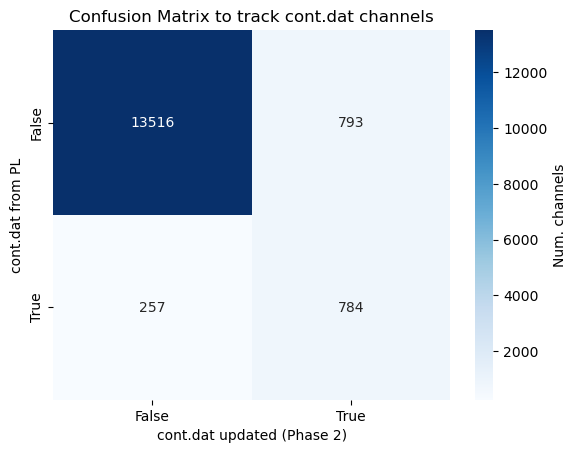

In [20]:
# Calculate the cross-tabulation table
confusion_matrix = pd.crosstab(dftrack['cont.dat v0'], dftrack['cont.dat v1'])

# Create the heatmap plot
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues",cbar_kws={'label': 'Num. channels'})

# Add labels and title
plt.xlabel('cont.dat updated (Phase 2)')
plt.ylabel('cont.dat from PL')
plt.title('Confusion Matrix to track cont.dat channels')

# Display the plot
plt.savefig('compass_contdat_ph02_confmatrix.png')





## Calculate total bandwidth in channels corresponding to pipeline cont.dat, and updated cont.dat 


In [21]:

# Access the values in the confusion matrix
true_true = confusion_matrix.loc[True, True]
false_true = confusion_matrix.loc[False, True]
true_false = confusion_matrix.loc[True, False]
false_false = confusion_matrix.loc[False, False]

# Print the values (these are numbers of channels)
print("True True:", true_true)
print("False True:", false_true)
print("True False:", true_false)
print("False False:", false_false)
print("total channels:", (true_true+false_true+true_false+false_false))
if (true_true+false_true+true_false+false_false) != (spw01.shape[0]+spw02.shape[0]+spw03.shape[0]+spw04.shape[0]):
    print('****check total number of channels, something does not add up')
else: 
    print('all channels accounted for')

True True: 784
False True: 793
True False: 257
False False: 13516
total channels: 15350
all channels accounted for


In [22]:
channelwidth = spw04['frequency_(GHz)'][1]*u.GHz-spw04['frequency_(GHz)'][0]*u.GHz
continwidth_pl = (true_true+true_false)*channelwidth
continwidth_new = (true_true+false_true)*channelwidth
totalbandwidth = (true_true+true_false+false_true+false_false)*channelwidth
print('continuum width by PL: {0:.4f}, updated continuum width: {1:.4f}'.format(continwidth_pl,continwidth_new))
print('total bandwidth {0:.4f}'.format(totalbandwidth))

continuum width by PL: 0.2540 GHz, updated continuum width: 0.3848 GHz
total bandwidth 3.7454 GHz
